# MDI720
# TP n°1 - INTRODUCTION : PYTHON, NUMPY, PANDAS

## INTRODUCTION À PANDAS, MATPLOTLIB, ETC

### Setups

In [1]:
import math 
import numpy as np
from sklearn import linear_model
from os import mkdir

In [2]:
from os import path 
import pandas as pd
import urllib
import zipfile

import matplotlib.dates as mdates

In [3]:
# Set the local path to your own path if necessary
# This path will enable to access the data
local_path = '/Users/thaianthantrong/Documents/MS_Big_Data/Cours/MDI720/TP1'

In [4]:
# Show the graphs here
%pylab inline

# Configuration
pylab.rcParams['figure.figsize'] = (14,8) # figures sizes
import matplotlib.pyplot as plt
plt.style.use('ggplot') # Chose ggplot instead of seaborn

lw = 2.3 # linewidth in all graphics

Populating the interactive namespace from numpy and matplotlib


In [5]:
# Color variables
color_global_active_power = 'darkcyan'
color_temperature = 'palevioletred'
color_O3 = 'mediumpurple'
color_NO2 = 'cornflowerblue'

### Question 1

In [2]:
url = u'https://archive.ics.uci.edu/ml/machine-learning-databases/00235/'
filename = 'household_power_consumption'
zipfilename = filename + '.zip'
Location = url + zipfilename
if not(path.isfile(zipfilename)):
    urllib.request.urlretrieve(Location, zipfilename)
zip = zipfile.ZipFile(zipfilename)
zip.extractall()
na_values = ['?', '']
fields = ['Date', 'Time', 'Global_active_power']
df = pd.read_csv(filename + '.txt', sep=';', nrows=200000,
               na_values=na_values, usecols=fields)

NameError: name 'path' is not defined

In [7]:
# Take a look at the loaded dataframe
print(df.head())

         Date      Time  Global_active_power
0  16/12/2006  17:24:00                4.216
1  16/12/2006  17:25:00                5.360
2  16/12/2006  17:26:00                5.374
3  16/12/2006  17:27:00                5.388
4  16/12/2006  17:28:00                3.666


### Question 2

In [8]:
# Number of lines with missing values
print('Number of lines with missing values : %d' %df.isnull().any(axis=1).sum())

# Initial length of df
print('Initial length of df : %d' %len(df))

Number of lines with missing values : 3732
Initial length of df : 200000


In [9]:
# Delete rows with missing values
df = df.dropna(axis=0, how='any')
print('New length of df : %d' %len(df))

New length of df : 196268


### Question 3

In [10]:
# Create a datetime column in the DataFrame df 
df['Datetime'] = df['Date'] + ' ' + df['Time']
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%d/%m/%Y %H:%M:%S')

# Set df indices to Datetime
df_formatted = df.set_index('Datetime')

# Remove old Date and Time column
del df_formatted['Date']
del df_formatted['Time']

print(df_formatted.head())

                     Global_active_power
Datetime                                
2006-12-16 17:24:00                4.216
2006-12-16 17:25:00                5.360
2006-12-16 17:26:00                5.374
2006-12-16 17:27:00                5.388
2006-12-16 17:28:00                3.666


### Question 4

In [11]:
# Select values from 01/01/2007 and 04/30/2007
start = '2007-01-01'
end = '2007-04-30'
selection = df_formatted[start : end]

# Compute daily average
selection = selection.resample('D').mean()

print(selection.head())

            Global_active_power
Datetime                       
2007-01-01             1.909031
2007-01-02             0.881414
2007-01-03             0.704204
2007-01-04             2.263481
2007-01-05             1.884281


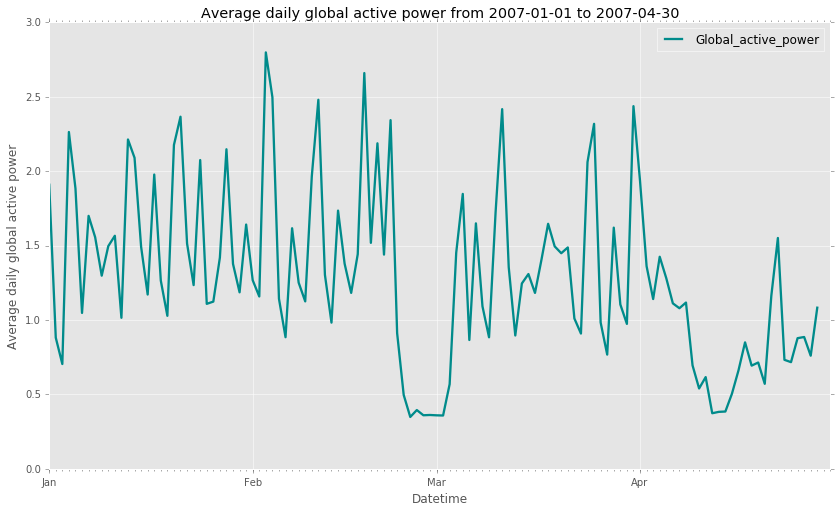

In [12]:
# Get values to plot
x = selection.index.values
y = selection['Global_active_power']

#Set ticks
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator()  # every day
monthsFmt = mdates.DateFormatter('%b')

ax_q4 = plt.gca()
ax_q4.xaxis.set_major_locator(months)
ax_q4.xaxis.set_major_formatter(monthsFmt)
ax_q4.xaxis.set_minor_locator(days)

# Plot results
ax_q4.plot_date(x, y, '-', linewidth=lw, c=color_global_active_power)

plt.title('Average daily global active power from ' + start + ' to ' + end)
plt.xlabel('Datetime')
plt.ylabel('Average daily global active power')
plt.legend()
plt.show()

At the end of February as well as at the end of April, we can see that global active power decreases significantly. We can think about several explanations :
- Holidays start at the end of February and at the beginning of April. People leave there house during these periods and turn their machines off, thus leading to a reduction of active power
- The end of February is relatively warmer than December or January. Consequently, global active power is less necessary than before. We can have the same explanation for April, since this month also corresponds to the beginning of Spring.

### Question 5

In [13]:
df_tg = pd.read_table(local_path + '/TGSTAID011249.txt', sep=",", comment='#')

In [14]:
print(df_tg.head())

   STAID   SOUID      DATE     TG   Q_TG
0  11249   71642  19210301     50      0
1  11249   71642  19210302     46      0
2  11249   71642  19210303     46      0
3  11249   71642  19210304     31      0
4  11249   71642  19210305     95      0


In [15]:
# Get the column values
col_val = df_tg.columns.values
print(col_val)

['STAID' ' SOUID' '    DATE' '   TG' ' Q_TG']


In [16]:
# Get rid of any space in the column names
col_val_formatted = [col.replace(' ', '') for col in col_val]
print(col_val_formatted)

# Replace old column values with the new one
df_tg.columns = col_val_formatted

print(df_tg.head())

['STAID', 'SOUID', 'DATE', 'TG', 'Q_TG']
   STAID  SOUID      DATE  TG  Q_TG
0  11249  71642  19210301  50     0
1  11249  71642  19210302  46     0
2  11249  71642  19210303  46     0
3  11249  71642  19210304  31     0
4  11249  71642  19210305  95     0


In [17]:
# Keep only DATE and TG columns
df_tg_selected = df_tg[['DATE', 'TG']] # The DataFrame we will use next

print(df_tg_selected.head())

       DATE  TG
0  19210301  50
1  19210302  46
2  19210303  46
3  19210304  31
4  19210305  95


In [18]:
# Divide TG by 10
# We choose here to create a new column instead of modifying the existing one
df_tg_selected.loc[:, 'TG Celsius'] = df_tg_selected.loc[:, 'TG'] / 10

print(df_tg_selected.head())

       DATE  TG  TG Celsius
0  19210301  50         5.0
1  19210302  46         4.6
2  19210303  46         4.6
3  19210304  31         3.1
4  19210305  95         9.5


/Users/thaianthantrong/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:284: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/thaianthantrong/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [19]:
# Delete NaN values or noise
df_tg_selected = df_tg_selected.loc[abs(df_tg_selected['TG Celsius']) < 80] # Remove noise : Temperatures that are way too high to be normal in Orly !
df_tg_selected = df_tg_selected.dropna(axis = 0) 

print(df_tg_selected.head())

       DATE  TG  TG Celsius
0  19210301  50         5.0
1  19210302  46         4.6
2  19210303  46         4.6
3  19210304  31         3.1
4  19210305  95         9.5


### Question 6

In [20]:
# Convert df_tg_selected['DATE'] from string to datetime
df_tg_selected['DATE'] = pd.to_datetime(df_tg_selected['DATE'], format='%Y%m%d')

#Set df_tg_selected['DATE'] as the index and delete the column
df_tg_selected = df_tg_selected.set_index('DATE')

#del df_tg_selected['DATE']
print(df_tg_selected.head())

            TG  TG Celsius
DATE                      
1921-03-01  50         5.0
1921-03-02  46         4.6
1921-03-03  46         4.6
1921-03-04  31         3.1
1921-03-05  95         9.5


In [21]:
# Select date interval
selection_tg = df_tg_selected['2007-01-01':'2007-04-30']
print(selection_tg.head())

             TG  TG Celsius
DATE                       
2007-01-01   96         9.6
2007-01-02   60         6.0
2007-01-03   61         6.1
2007-01-04   92         9.2
2007-01-05  100        10.0


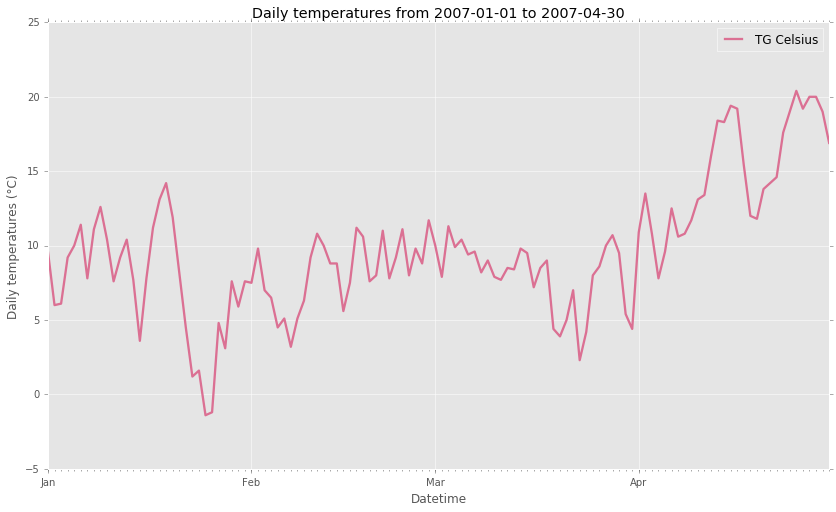

In [22]:
# Get values
x_tg = selection_tg.index.values
y_tg = selection_tg['TG Celsius']

# Set ticks
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator()  # every day
monthsFmt = mdates.DateFormatter('%b')

ax_q6 = plt.gca()
ax_q6.xaxis.set_major_locator(months)
ax_q6.xaxis.set_major_formatter(monthsFmt)
ax_q6.xaxis.set_minor_locator(days)

# Plot results
plt.plot_date(x_tg, y_tg, '-', linewidth=lw, c=color_temperature)

plt.title('Daily temperatures from ' + start + ' to ' + end)
plt.xlabel('Datetime')
plt.ylabel('Daily temperatures (°C)')

plt.legend()
plt.show()
plt.close()

The graph above displays daily temperatures as a function of datetime. Temperatures are unstable in January, and reach negative values sometimes, before they start increasing in February and become more stable. We can also see a significant increase in April, where temperatures are almost twice the values in February.

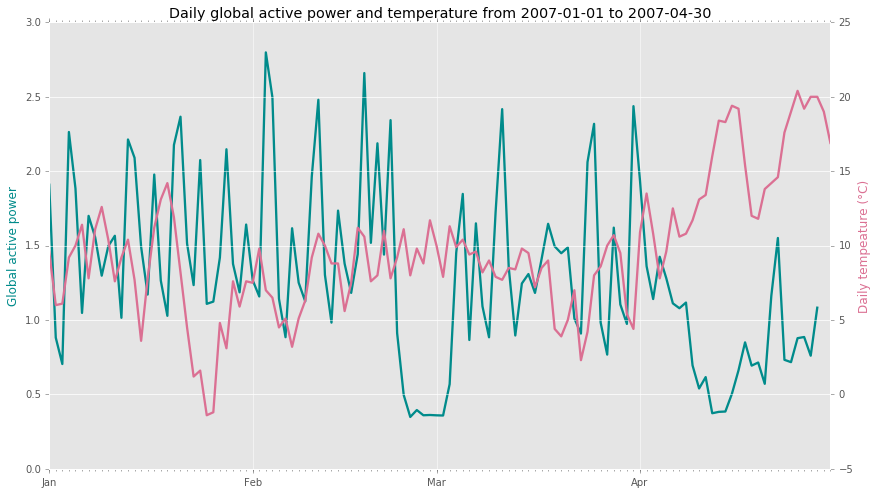

In [23]:
# Plot everything together

## Global active power
ax1_q6 = plt.gca()
ax1_q6.xaxis.set_major_locator(months)
ax1_q6.xaxis.set_major_formatter(monthsFmt)
ax1_q6.xaxis.set_minor_locator(days)

ax1_q6.plot(x, y, linewidth=lw, c=color_global_active_power, label='Global active power')
ax1_q6.set_ylabel('Global active power', color=color_global_active_power)


## Temperature
ax2_q6 = ax1_q6.twinx()
ax2_q6.plot(x_tg, y_tg, '-', linewidth=lw, c=color_temperature, label='Daily temperature')
ax2_q6.set_ylabel('Daily tempeature (°C)', color=color_temperature)

plt.xticks(rotation=45)

plt.title('Daily global active power and temperature from ' + start + ' to ' + end)
plt.show()

On the one hand, at the end of February as well as at the end of April, we can see that global active power decreases significantly. On the other hand, temperatures seem to be stable in February, and to increase in April. A possible explanation can be the holidays in February that lead to a reduction of global active power, while the temperature did not have any important impact, but it did have one in April.

### Question 7

In [24]:
# Set the file to your own path if necessary
df_airparif = pd.read_table(local_path + '/20080421_20160927-PA13_auto.csv', sep=";", na_values='n/d')

print(df_airparif.head())

         date  heure        NO2         O3
0         NaN    NaN  microg/m3  microg/m3
1  21/04/2008    1.0         13         74
2  21/04/2008    2.0         11         73
3  21/04/2008    3.0         13         64
4  21/04/2008    4.0         23         46


In [25]:
# Save units for graphics legends
units = df_airparif.loc[0, :]

# Print O3 unit
print('O3 unit : ' + units['O3'])

# Print NO2 unit
print('NO2 unit : ' + units['NO2'])

O3 unit : microg/m3
NO2 unit : microg/m3


In [26]:
# Drop the first line (units)
df_airparif = df_airparif.drop(df_airparif.index[0]) 

# Print head
print(df_airparif.head())

         date  heure NO2  O3
1  21/04/2008    1.0  13  74
2  21/04/2008    2.0  11  73
3  21/04/2008    3.0  13  64
4  21/04/2008    4.0  23  46
5  21/04/2008    5.0  47  24


In [27]:
# # Convert df_airparif['date'] from string to datetime
df_airparif['date'] = pd.to_datetime(df_airparif['date'], format='%d/%m/%Y')

#Set df_airparif['date'] as the index and delete the column
df_airparif = df_airparif.set_index('date')

print(df_airparif.head())

            heure NO2  O3
date                     
2008-04-21    1.0  13  74
2008-04-21    2.0  11  73
2008-04-21    3.0  13  64
2008-04-21    4.0  23  46
2008-04-21    5.0  47  24


In [28]:
# Remove any line that contains NaN values
# simple function to try to convert the type, returns NaN if the value cannot be coerced
def convert_int(x):
    try:
        return int(x)
    except ValueError:
        return np.NaN

print('Length of first Dataframe before cleaning : %d' %len(df_airparif))

# assign NO2 and O3 columns 
df_airparif['NO2'], df_airparif['O3'] = df_airparif['NO2'].apply(convert_int), df_airparif['O3'].apply(convert_int)

df_airparif = df_airparif.dropna(axis=0)
print('Length of new Dataframe after cleaning : %d' %len(df_airparif))

Length of first Dataframe before cleaning : 73920
Length of new Dataframe after cleaning : 69465


In [29]:
# Average pollution for ozone per year
df_year = df_airparif.resample('A').mean()
df_year.name = 'Average O3 per year'

print(df_year)

                heure        NO2         O3
date                                       
2008-12-31  12.490761  34.685326  39.830797
2009-12-31  12.506127  38.418050  40.237682
2010-12-31  12.521602  37.898665  37.641383
2011-12-31  12.518250  34.934373  37.976070
2012-12-31  12.546172  33.999072  37.140139
2013-12-31  12.506456  34.584896  40.101462
2014-12-31  12.508262  35.234977  39.909239
2015-12-31  12.523126  31.489467  40.803695
2016-12-31  12.521490  27.615727  45.155524


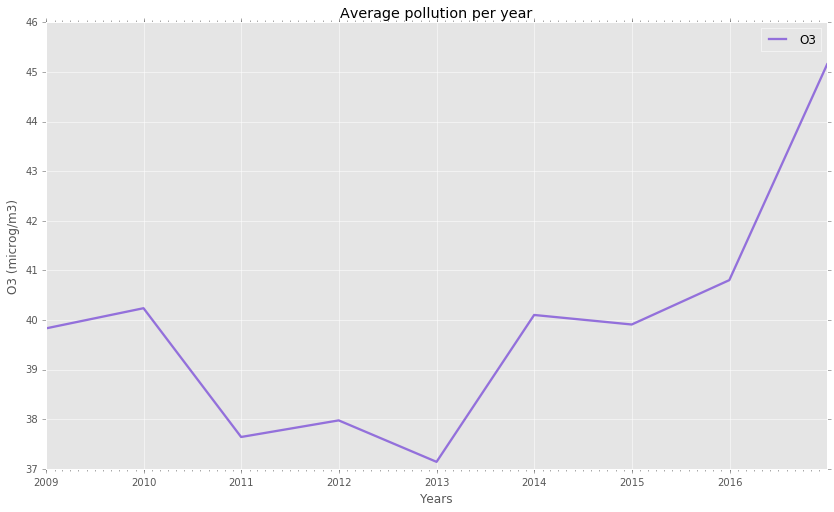

In [30]:
# Get values
years_x = df_year.index.values
ozone = df_year.O3

# Set ticks
years = mdates.YearLocator()
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator()  # every day
yearsFmt = mdates.DateFormatter('%Y')

ax_q7 = plt.gca()
ax_q7.xaxis.set_major_locator(years)
ax_q7.xaxis.set_major_formatter(yearsFmt)
ax_q7.xaxis.set_minor_locator(months)

# plot average ozone values per year
ax_q7.plot(years_x, ozone, linewidth=lw, c=color_O3, label='O3')

plt.title('Average pollution per year')
plt.xlabel('Years')
plt.ylabel('O3 (' + units['O3'] + ')')
plt.legend()
plt.show()

The graph above represents the average pollution per year (for ozone) as a function of time. For the horizontal axis we display the years as the major ticks, as well as the months as the minor ticks. This representation enables us to see that the pollution evolves throughout the years, but there are also significant variations during a single year.
The average pollution was the lowest in 2013, before increasing until late 2016. 

### Question 8

In [31]:
# Most critical pollution per year
print(df_airparif.head())

            heure   NO2    O3
date                         
2008-04-21    1.0  13.0  74.0
2008-04-21    2.0  11.0  73.0
2008-04-21    3.0  13.0  64.0
2008-04-21    4.0  23.0  46.0
2008-04-21    5.0  47.0  24.0


In [32]:
# Manipulate data to get the max values per year
critical_O3 = df_airparif['O3'].resample('A').max()
critical_NO2 = df_airparif['NO2'].resample('A').max()

critical_O3.name = "O3's most critical values"
critical_NO2.name = "NO2's most critical values"

print('--- CRITICAL O3 FOR EACH YEAR---')
print(critical_O3)

print()

print('--- CRITICAL NO2 FOR EACH YEAR---')
print(critical_NO2)

--- CRITICAL O3 FOR EACH YEAR---
date
2008-12-31    170.0
2009-12-31    186.0
2010-12-31    182.0
2011-12-31    173.0
2012-12-31    203.0
2013-12-31    177.0
2014-12-31    159.0
2015-12-31    185.0
2016-12-31    211.0
Freq: A-DEC, Name: O3's most critical values, dtype: float64

--- CRITICAL NO2 FOR EACH YEAR---
date
2008-12-31    133.0
2009-12-31    167.0
2010-12-31    157.0
2011-12-31    160.0
2012-12-31    150.0
2013-12-31    140.0
2014-12-31    145.0
2015-12-31    135.0
2016-12-31    137.0
Freq: A-DEC, Name: NO2's most critical values, dtype: float64


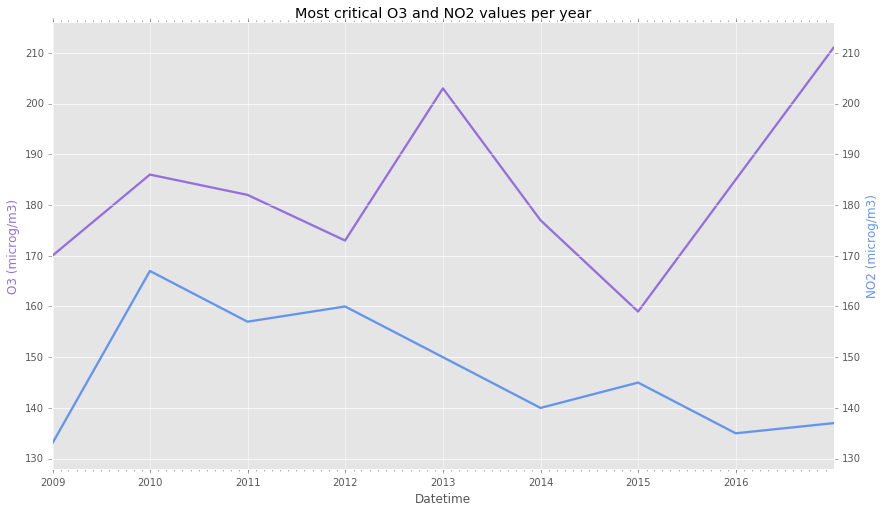

In [33]:
# Plot most critical values per year

# Set ticks
years = mdates.YearLocator()
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator()  # every day
yearsFmt = mdates.DateFormatter('%Y')

ax1_q8 = plt.gca()
ax1_q8.xaxis.set_major_locator(years)
ax1_q8.xaxis.set_major_formatter(yearsFmt)
ax1_q8.xaxis.set_minor_locator(months)

# Plot results
## O3
ax1_q8.plot(years_x, critical_O3,  linewidth=lw, c=color_O3, label='O3')
ax1_q8.set_ylabel('O3 (' + units['O3'] + ')', color=color_O3)

## NO2
ax2_q8 = ax1_q8.twinx() # Scale on the right for NO2
ax2_q8.plot(years_x, critical_NO2,  linewidth=lw, c=color_NO2, label='NO2')
ax2_q8.set_ylabel('NO2 (' + units['NO2'] + ')', color=color_NO2)

# Set each axis to the same scale
pas = 5 
y_max = max([critical_O3.max(), critical_NO2.max()]) + pas
y_min = min([critical_O3.min(), critical_NO2.min()]) - pas
ax1_q8.set_ylim(y_min, y_max)
ax2_q8.set_ylim(y_min, y_max)

plt.title('Most critical O3 and NO2 values per year')
ax1_q8.set_xlabel('Datetime')

plt.show()

The graph show the most critical O3 and NO2 values throughout the years. We decided to display the years, while distinguing the months as well (small ticks on the graph). 
- O3 values have reached a peak in 2013 with a value around 202 mcrog/m3, though values seem to be even greater at the end of 2016. 
- NO2 values have reached a peak in 2020 and globally fall since. 

### Question 9

In [34]:
# Pollution per month

df_month = df_airparif.resample('M').mean()

For this question we will see two representations.
- The first one aims to see if there is a pattern in O3 and NO2's values throughout the years : do the values grow or decrease at the same time of the year ?
- The second one aims to focus more on the different months of the years. 

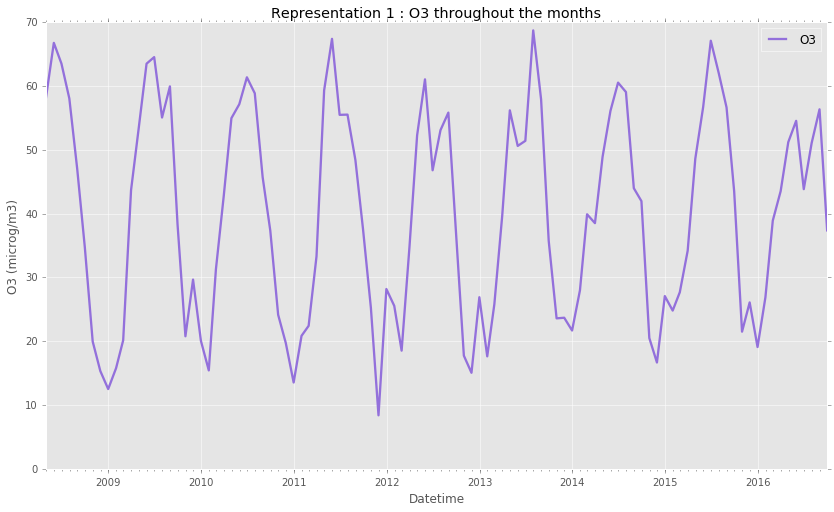

In [35]:
## First representation : plot for each year and see a pattern

#### O3 ####
#Get values
x01 = df_month.index.values
y01 = df_month['O3']

ax1_q9 = plt.gca()

# Set ticks
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

# Format the ticks
ax1_q9.xaxis.set_major_locator(years)
ax1_q9.xaxis.set_major_formatter(yearsFmt)
ax1_q9.xaxis.set_minor_locator(months)

# Plot results
ax1_q9.plot_date(x01, y01, '-', linewidth=lw, c=color_O3)

plt.title('Representation 1 : O3 throughout the months')
plt.xlabel('Datetime')
plt.ylabel('O3 (' + units['O3'] + ')')
plt.legend()
plt.show()

We can see a pattern in this representation : the O3 rate evolves at the same time of the year. At the beginning of a year it increases and takes high values at the middle of the year(between 60 and 70), before decreasing until the end of the year (values between 20 and 10). The cycle then restarts.

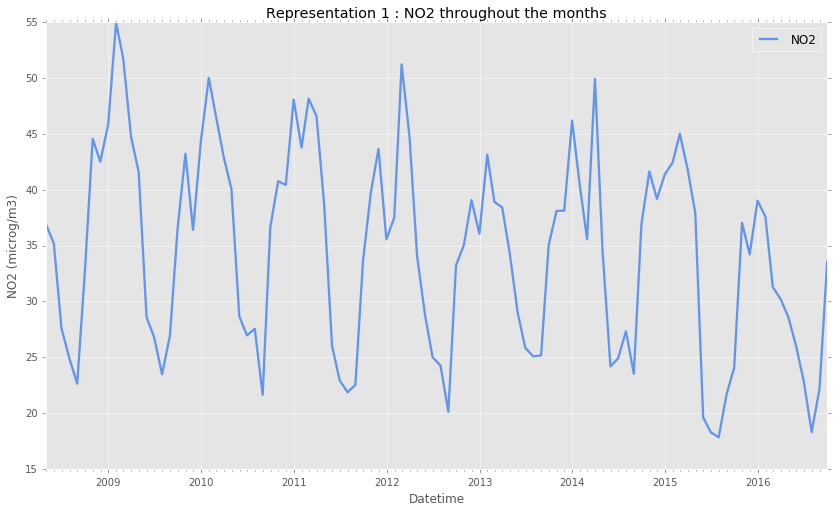

In [36]:
#### NO2 ####
#Get values
x02 = df_month.index.values
y02 = df_month['NO2']

ax1_q9 = plt.gca()

# Set ticks
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

# Format the ticks
ax1_q9.xaxis.set_major_locator(years)
ax1_q9.xaxis.set_major_formatter(yearsFmt)
ax1_q9.xaxis.set_minor_locator(months)

# Plot results
ax1_q9.plot_date(x02, y02, '-', linewidth=lw, c=color_NO2)

plt.title('Representation 1 : NO2 throughout the months')
plt.xlabel('Datetime')
plt.ylabel('NO2 (' + units['NO2'] + ')')
plt.legend()
plt.show()

We can also see a pattern in this representation. At the beginning of a year it decreases and goes from 50-55 to 20-25, before increasing until the end of the year.

In [37]:
## Second representation : compute the average ozone values for each month throughout the years
df_group = df_airparif.groupby([df_airparif.index.month], as_index=True).mean()
print(df_group)

        heure        NO2         O3
1   12.505549  43.702066  21.891412
2   12.527534  43.548815  28.112003
3   12.529756  42.428091  38.873007
4   12.512360  36.099057  52.991997
5   12.525333  27.334428  59.253502
6   12.530017  24.261955  56.600000
7   12.496156  23.391678  57.976330
8   12.520738  22.951052  52.410643
9   12.504398  33.543237  38.190871
10  12.534159  40.165968  21.571871
11  12.496476  39.059162  19.564726
12  12.524758  41.986411  20.943038


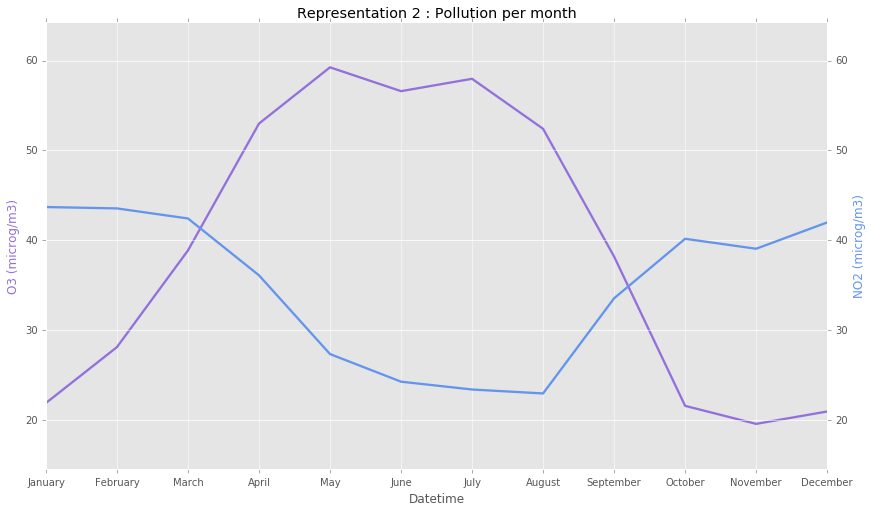

In [38]:
# Get values
x1 = df_group.index.values
y1 = df_group['O3']
y2 = df_group['NO2']

labels_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(x1, labels_months)

ax21_q9 = plt.gca()
# Plot results
ax21_q9.plot_date(x1, y1, '-', linewidth=lw, c=color_O3, label='O3')
ax21_q9.set_ylabel('O3 (' + units['O3'] + ')', color=color_O3)

ax22_q9 = ax21_q9.twinx()
ax22_q9.plot(x1, y2,  linewidth=lw, c=color_NO2, label='NO2')
ax22_q9.set_ylabel('NO2 (' + units['NO2'] + ')', color=color_NO2)

# Set each axis to the same scale
y_max_2 = max([y1.max(), y2.max()]) + pas
y_min_2 = min([y1.min(), y2.min()]) - pas
ax21_q9.set_ylim(y_min_2, y_max_2)
ax22_q9.set_ylim(y_min_2, y_max_2)

plt.title('Representation 2 : Pollution per month')
ax21_q9.set_xlabel('Datetime')
plt.show()

O3 and NO2 take opposite values throughout the whole year : when O3's values are high - between April and August - NO2's values reach their minimum. On the contrary, when NO2's values increase, O3's values decrease. 

According to the graph, the most polluted month for O3 is May (the values reach almost 60 microg/m3) while the most polluted month for NO2 is January (the valyes reach almost 45 microg/m3).

These remarks are in fact consistent with physical phenomenoms : most of O3 productions come from heat and strong sunlight - these conditions are filled between April and August and not during the rest of the year, while NO2 production come from human activites such as vehiculs and heatings. Heatings are mainly used during cold periods, between October and March, and that explains higher NO2 values.  